In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def helix_vector(site_index, a, c, num_sites):
    x = 2*np.pi*a*np.cos(site_index)/(num_sites-1)
    y = 2*np.pi*a*np.sin(site_index)/(num_sites-1)
    z = c*(site_index)/(num_sites-1)

    return np.asarray([x,y,z])

In [44]:
def d_vector(site_index, s, a, c, num_sites):
    r_i = helix_vector(site_index, a, c, num_sites)
    r_is = helix_vector(site_index+s, a, c, num_sites)

    d = r_i - r_is
    d = d/np.sqrt(np.dot(d, d))

    return d

In [45]:
def v_vector(site_index, a, c, num_sites):
    d1 = d_vector(site_index, 1, a, c, num_sites)
    d2 = d_vector(site_index, 2, a, c, num_sites)

    v = np.cross(d1, d2)

    return v

In [46]:
def v_vector_array(a, c, num_sites):
    v_list = []
    for idx in range(num_sites):
        v_list.append(v_vector(idx, a, c, num_sites))
    v_array = np.asarray(v_list)

    return v_array

In [63]:
v_test = v_vector_array(1, 1, 20)
site_idx = np.arange(0, 20, 1)
print(v_test.shape)

(20, 3)


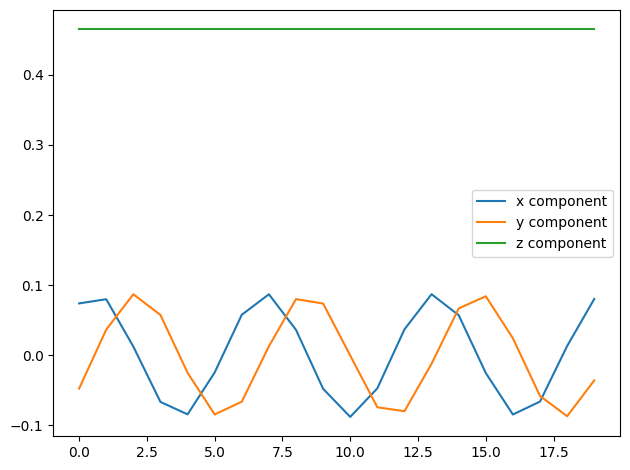

In [64]:
fig, ax1 = plt.subplots(nrows=1)
ax1.plot(site_idx, v_test[:, 0], label="x component")
ax1.plot(site_idx, v_test[:, 1], label="y component")
ax1.plot(site_idx, v_test[:, 2], label="z component")
ax1.legend()
plt.tight_layout()
plt.show()